# Projetos de ciência de dados com Python

## Capítulo 5 - Árvores de decisão e florestas aleatórias

### Exercícios

- Exercício 19: Uma árvore de decisão no scikit-learn

- Exercício 20: Encontrando hiperparâmetros ótimos para uma árvore de decisão.

- Exercício 21: Ajustando uma floresta aleatória

- Atividade 5: Busca em grade na validação cruzada com floresta aleatória

---

### Exercício 19: Uma árvore de decisão no scikit-learn

Neste exercício, usaremos os dados do estudo de caso para criar uma árvore de decisão e especificaremos a profundidade máxima. Também empregaremos uma funcionalidade útil para visualizar a árvore. Execulte as etapas a seguir para fazer o exercício

1. Inicie um novo notebook para este capítulo. Para começar, carregue todos os pacotes que usamos, e mais um, *graphviz*, para podermos visualizar árvores de decisão:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import graphviz

2. Carregue os dados limpos do estudo de caso:

In [7]:
df = pd.read_csv('/home/matheus/projetos/du-starter/chapter_1_cleaned_data.csv')

3. Obtenha uma lista com os nomes de colunas do DataFrame:

In [8]:
features_response = df.columns.tolist()

4. Crie uma lista de colunas para remover as que não sejam características ou a variável de resposta:

In [9]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

5. Use uma list comprehension para remover esses nomes de colunas de nossa lista com as características e a variável de resposta

In [10]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Agora as características estão preparadas para uso. Em seguida, faremos algumas importações a partir do scikit-learn. Queremos criar uma divisão de treinamento/teste, com a qual já estamos familiarizados. Também queremos importar a classe de árvore de decisão

6. Execute este código para fazer importações a partir do scikit-learn:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import tree

A biblioteca *tree* contém as classes relacionadas à árvore de decisão no scikit-learn

7. Divida os dados em treinamento e teste com o mesmo seed aleatório que usamos em todo o livro para a divisão

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, df['default payment next month'].values, test_size=0.2, random_state=24)

Empregamos todos os elementos da lista, exceto o último, para obter os nomes das características, sem a variável resposta: features_response[:-1]. Fizemos isso para selecionar colunas do DataFrame e recuperar seus valores usando o método *.values*. Fizemos algo semelhante para a variavel resposta, mas especificamos o nome da coluna diretamente. Na criação da divisão de treinamento/teste, usamos o mesmo seed aleatório do trabalho anterior e o mesmo tamanho de divisão. Dessa forma, podemos comparar o trabalho que faremos neste capítulo com resultados anteriores. Especificamente, reservamos o mesmo "conjunto de teste desconhecido" do processo de desenvolvimento de modelo que executamos até aqui.

Estamos prontos para instanciar a classe de árvore de decisão.

8. Instancie a classe de árvore de decisão especificando o parâmetro *max_depth* como 2:

In [13]:
dt = tree.DecisionTreeClassifier(max_depth=2)

Usamos a classe *DecisionTreeClassifier* poruqe temos um problema de classificação. Já que especificamos *max_depth=2*, quando criarmos a árvore de decisão com os dados do estudo de caso ela crescerá até uma profundidade de no máximo 2. Agora treinaremos esse modelo.

9. Use este código para ajustar o modelo de árvore de decisão e criar a árvore:

In [14]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Na saída de ajuste do modelo é possível ver todas as opções que podem ser definidas com uma árvore de decisão; deixamos a maioria com suas configurações padrão - vamos discuti-las em breve. Por enquanto, ajustamos esse modelo de árvore de decisão para poder usar o pacote *graphviz* e exibir uma representação gráfica da árvore.

10. Exporte o modelo treinado em um formato que seja lido pelo paacote *graphviz* usando este código:

In [15]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=features_response[:-1], proportion=True, class_names=['Not defaulted', 'Defaulted'])

Aqui, especificamos várias opções para o método *.export_graphviz*. Primeiro, tivemos de informar que o modelo treinado queremos representar, o que foi indicado com o objeto dt. em seguida, informamos que não queremos um arquivo de saída: *out_file=None*. Em vez dele, fornecemos a variável *dot_data* para armazenar a saída desse método. O resto das opções foi usado da seguinte forma:

- *filled=True*: Cada nó será preenchido com uma cor.
- *rounded=True*: Os nós aparecerão com bordas arredondadas, e não com retangulos
- *feature_names=features_response[:-1]*: Os nomes das características de nossa lista serão usados em vez de nomes genéricos como X[0]
- *proportion=True*: A proporção de amostras de cada nó será exibida (discutiremos isso melhor posteriormente)
- *class_names=['Not defaulted', 'Defaulted']*: O nome da classe prevista será exibido para cada nó.

Qual a saída desse método?

Se você examinar o conteúdo de dot_data, verá que ele é composta de uma longa string de texto. O pacote *graphviz* interpretará essa string de texto para criar uma visualização.

11. Use o método *.Source* do pacote graphviz para criar uma imagem de dot_data e exibi-la:

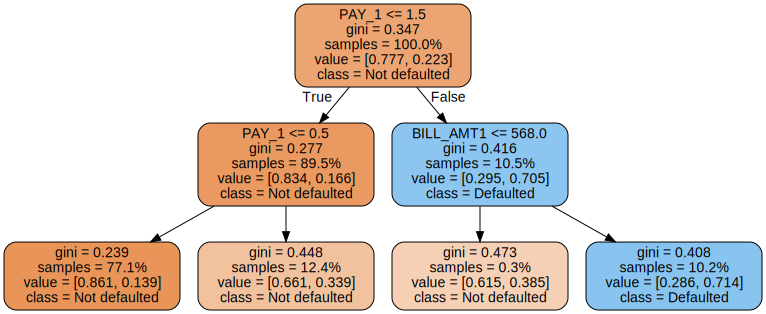

In [16]:
graph = graphviz.Source(dot_data)
graph

A visualização da figura contém muitas informações sobre como a árvore de decisão foi treinada e como ela pode ser usada para fazer previsões. Discutiremos o processo de treinamento com mais detalhes posteriormente, mas é suficiente dizer que o treinamento de uma árvore de decisão começa com todas as amostras de treinamento no nó inicial do topo da árvore e sua divisõa em dois grupos de acordo com um **limite** em uma das características. O ponto de corte é representado por uma condição booleana no nó *PAY_1 <= 1.5* superior.

Todas as amostras em que o valor da característica PAY_1 é menor ou igual ao ponto de corte de 1.5 serão representadas como *True* na condição booleana. Como mostrado na figura, essas amostras são classificadas no lado esquerdo da árvore, seguindo a seta que exibe "True" perto dela.

Como você pode ver no gráfico, cada nó que é dividido contém os critérios de divisão na primeira linha de texto. A linha seguinte faz referência a "gini", que discutiremos em breve.

Na linha posterior à linha gini, há informações sobre a proporção de amostras de cada nó. No nó superior, estamos começando com todas as amostras ("samples = 100.0%"). Após a primeira divisão, 89,5% das amostras são classificadas no nó da esquerda, enquanto as 10,5% restantes vão para o nó da direita. Essas informações são exibidas diretamente na visualização e refletem como os dados de treinamento foram usados para criar a árvore. Confirmaremos isso examinando os dados de treinamento.

12. Para confirmar a proporção de amostras de treinamento em que a característica PAY_1 é menor ou igual a 1.5, primeiro identificaremos o índice dessa característica na lista de nomes de características *features_response[:-1]*:

In [17]:
features_response[:-1].index('PAY_1')

4

13. Agora obtenha a dimensão dos dados de treinamento:

In [18]:
X_train.shape

(21331, 17)

Para confirmar a fração de amostras após a primeira divisão da árvore de decisão, temos de saber a proporção de amostras em que a característica PAY_1 atende a condição booleana usada. Para obter essa informação, podemos usar o índice da característica PAY_1 nos dados de treinamento, correspondente ao índice na lista de nomes características, e o número de amostras do mesmo conjunto de dados, que é o número de linhas que observamos com *.shape*

14. Use este código para confirmar a proporção de amostras após a primeira divisão da árvore de decisão:

In [19]:
sum(X_train[:, 4] <= 1.5)/X_train.shape[0]

0.8946134733486475

Aplicando uma condição lógica à coluna dos dados de treinamento correspondente à característica PAY_1, e obtendo a soma disso, calculamos o número de amostras que a atendem. Em seguida, dividindo pelo número total de amostras, convertemos o resultado em uma proporção. Podemos ver que a proporção que calculamos diretamente a partir dos dados de treinamento é igual à proporção exibida no nó esquerdo após a primeira divisão na figura.

Após a primeira divisão, as amostras contidas em cada um dos dois nós do primeiro nível são divididas novamente. À medida que novas divisões forem feitas depois da primeira divisão, proporções cada vez menores dos dados de treinamento serão atribuidas a nós específicos nos níveis subsequentes de um galho, como pode ser visto na figura

Agora queremos interpretar as linhas de texto restantes dos nós da figura. As linhas que começam com "value" fornecem as frações de classes da variável de resposta para as amostras contidas em cada nó. Por exemplo, no nó superior, vemos "value = [0.777, 0.223]". Isso é simplesmente a fração de classes do conjunto de treinamento total, que podemos confirmar na próxima etapa

15. Calcule a fração de classes do conjunto de treinamento com este código

In [20]:
np.mean(y_train)

0.223102526838873

Esse valor é igual ao segundo membro do par de numeros que vem apos "value" no nó superior; o primeiro número é apenas um menos esse valor, em outras palavras, a fraçao de amostra de treinamento negativas. Em cada nó subsequente, a fração de amostras de que estiverem contidas apenas nesse nó será exibida. As frações de classes também mostram como os nós serão coloridos: os que tiverem maior proporção da classe negativa serão laranja, com laranja escuro significando proporções mais altas, enquanto os de maior proporção da classe positiva terão um esquema semelhante usando a cor azul.

Para concluir, a linha que começa com "class" indica como a árvore de decisão fará previsões a partir de um nó específico, se ele for um nó folha. Árvores de decisão usadas para classificação fazem previsões determinando em que ní folha uma amostra será classificada, dados os valores das características, e prevendo a classe da maioria das amostras de treinamento nesse nó são as informações necessárias para fazermos uma previsão.

Por exemplo, se não fizermos divisões e formos forçados a fazer uma previsão não sabendo nada exceto as frações de classes dos dados de treinamento totais, escolheremos simplesmente a classe majoritária. Já que a maiorias das pessoas não está inadimplente, a classe do nó superior será "Not defaulted". No entanto, As frações de classes dos nós de níveis mais profundos serão diferentes, levando a outras previsões. Discutiremos o processo de treinamento na próxima seção.

---

### Exercício 20: Encontrando hiperparâmetros ótimos para uma árvore de decisão.

Neste exercício, usaremos *GridSeachCV* para ajustar os hiperparâmetros de um modelo de árvore de decisão. Você conhecerá uma maneira conveniente de pesquisar diferentes hiperparâmetros com o scikit-learn. Execute as etapas a seguir para fazer o exercício:

1. Importe a classe GridSeachCV com este código:

In [21]:
from sklearn.model_selection import GridSearchCV

A próxima etapa é definir os hiperparâmetros que queremos pesquisar usando a validação cruzada. Encontraremos a melhor profundidade máxima da árvore usando o parâmetro max_depth. Árvores mais profundas têm mais divisões de nós, que particionam o conjunto de treinamento em subespaços cada vez menores usando as características. Não sabemos a melhor profundidade máxima antecipadamente, mas é útil considerar alguns casos limite ao pensar no intervalo de parâmetros usado na busca da grade.

Sabemos que um é a profundidade mínima, consistindo em uma árvore com apenas uma divisão. No que diz respeito à maior profundidade, você pode considerar quantas amostras há em seus dados de treinamento, ou mais apropriadamente nesse caso, quantas amostras existirão no fold de treinamento para cada divisão da validação cruzada. Executaremos uma validação cruzada com 4 folds, como fizemos no capítulo anterior. Logo, quantas amostras teremos no fold de treinamento e que relação isso tem com a profundidade da árvore?

2. Encontre o número de amostras dos dados de treinamento usando este código:

In [22]:
X_train.shape

(21331, 17)

Com 21.331 amostras de treinamento e uma validação cruzada com 4 folds, haverá três quartos da amostra, ou cerca de 16.000 amostras, em cada fold de treinamento.

**O que isso significa para a profundidade que daremos à arvore?**

Uma limitação teórica é a de que precisamos de pelo menos uma amostra em cada folha. Pela nossa discussão sobre como a profundidade da árvore está relacionada com o número de folhas, sabemos que uma árvore que se divide em cada nó antes do último nível tem $2^n$ nós folhas. Logo, uma árvore com L nós folhas tem profundidade de aproximadamente $log_{2}$(L). No caso limite, se estendermos a árvore até uma profundidade suficiente para que cada nó folha tenha uma única amostra de treinamento para um fold específico, a profundidade será igual a $log_{2}$(16,000) $\approx$ 14. Portanto, 14 é o limite teórico da profundidade da árvore que poderíamos criar nesse caso.

Na prática, provavelmente você não vai querer criar uma árvore com essa profundidade, já que as regras usadas para gerar a árvore de decisão serão muito especificas para os dados de treinamento e o modelo deve sofrer sobreajuste. No entato, isso nos dá uma ideia do intervalo de valores que podemos considerar para o hiperparâmetro max_depth. Examinaremos um intervalo de profundidades de 1 a 12.

3. Defina um dicionário com a chave sendo o nome do hiperparâmetro e o valor sendo a lista de valores desse hiperparâmetro que queremos pesquisar na validação cruzada:

In [23]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

Nesse caso, estamos pesquisando apenas um hiperparâmetro. No entanto, você poderia definir um dicionário com vários pares chave-valor para procurar diversos hiperparâmetros simultaneamente.

Agora queremos instanciar a classe *GridSearchCV*

4. Instancie a classe *GridSearchCV* usando estas opções:

In [24]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=1, pre_dispatch='None', error_score=np.nan, return_train_score=True)

Observe que pudemos reutilizar o objeto de árvore de decisão, dt, que instanciamos anteriormente neste capítulo. Ao criar dt, usamos os argumentos padrãopara todas as opções exceto max_depth. Porém esse hiperparâmetro será redefinido aqui com o uso do dicionário params em cada iteração do loope de validação cruzada. As outras opções dignas de nota são o uso da métrica ROC AUC (*scoring='roc_auc*), a execução de uma validação com 4 fold (*cv=4*) e o cálculo dos resultados do treinamento (*return_train_score=True*) para a avaliação do trade-off entre viés e variância.

Uma vez que o objeto de validação cruzada estiver definido, poderemos usar o método .fit nete como faríamos com um objeto de modelo. Isso encapsulará toda a funcionalidade do loop de validação cruzada que criamos no capítulo anterior

5. Execute uma validação cruzada com 4 folds para procurar a profundidade máxima ótima usando este código:

In [25]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch='None', return_train_score=True, scoring='roc_auc',
             verbose=1)

Todas as opções que especificamos foram exibidas como parte da saída. Além disso, há algumas informações na saída sobre quantos ajustes de validação cruzada foram executados. Tínmhamos 4 folds e 7 hiperparâmetros, o que totaliza 4 x 7 = 28 ajustes. O tempo que gastamos também foi exibido. Você pode controlar o volume de saída que deseja obter desse procedimento com o argumento de palavra-chave *verbose*; números maiores significam mais saída.

É hora de examinar os resultado do procedimento de validação cruzada. O método *cv_results_* é um dos que estão disponíveis no objeto *GridSearchCV* ajustado. Trata-se de um dicionário contendo os nomes dos resultados como chaves e os resultados prorpiamente deitos como valores. Por exemplo, a chave *mean_test_score* contém o resultado da média do teste em todos os folds para cada um dos sete hiperparâmetros. Você poderia examinar essa saída diretamente executando *cv.cv_results em uma célula de código. No entanto, ela não seria facil de ler. Dicionários com esse tipo de estrutura podem ser usados imediatamente na criação de um DataFrame no pandas, o que facilita a leitura dos resultados.

6. Execute o código a seguir para criar e examinar um DataFrame do pandas com resultados de validação cruzada:

In [26]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.029104,0.000483,0.004348,0.001200,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.053468,0.001004,0.003626,0.000251,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.087071,0.001170,0.003347,0.000179,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.131989,0.005596,0.004090,0.001007,6,{'max_depth': 6},0.744076,0.746505,0.751230,0.741517,0.745832,0.003581,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.157844,0.002129,0.003839,0.000101,8,{'max_depth': 8},0.729524,0.732023,0.750158,0.729601,0.735326,0.008622,3,0.811958,0.808187,0.803415,0.802004,0.806391,0.003947
5,0.188615,0.004671,0.003523,0.000349,10,{'max_depth': 10},0.710467,0.705948,0.718108,0.712953,0.711869,0.004391,4,0.849470,0.854313,0.841285,0.837073,0.845535,0.006749
6,0.218489,0.002165,0.003493,0.000253,12,{'max_depth': 12},0.674454,0.656018,0.673875,0.677981,0.670582,0.008554,6,0.888099,0.903608,0.885479,0.875527,0.888178,0.010067


O DataFrame tem uma linha para cada combinação de hiperparâmetros da grade. Já que só estamos pesquisando um hiperparâmetro aqui, há uma linha para cada um dos sete valores que pesquisamos. Podemos ver uma saída extensa para cada linha, como a média e o desvio padrão do tempo em segundos que cada um dos quatro folds demorou tanto no treinamento (ajuste) quanto no teste (resultado). Os valores de hiperparâmetros que foram pesquisados também são exibidos. Na tabela, podemos ver o resultado da ROC AUC para os dados de teste do primeiro fold (índice 0). Mas quais são as outras colunas do DataFrame de resultados?

7. Visualiza os nomes das outras colunas do Dataframe de resultados usando este código:

In [27]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

As colunas do DataFrame de resultados da validação cruzada incluem os resultados do teste para cada fold, sua média e desvio padrão, e as mesmas informações para os resultados do treinamento.

De modo geral, a "melhor" combinação de hiperparâmetros é a que tem o resultado de média de teste mais alto. Essa é uma estimativa de como o modelo, ajustado com esses hiperparâmetros, se sairia com novos dados. Criaremos uma pltagem exibindo como o resultado de média do teste varia com o hiperparâmetro *max_depth*. Também exibiremos os resultados de média do treinamento na mesma plotagem, para ver como o viés e a variância mudam à medida que permitimos que as árvores mais profundas e complexas sejam criadas durante o ajuste do modelo.

Incluiremos os desvios padrão dos resultados de treinamento e teste de 4 folds como barras de erro, usando a função *errorbar* do Matplotlib. Isso dará uma indicação de quanto os resultados variam entre os folds

8. Execute o código a seguir para criar a plotagem de uma barra de erro dos resultados de treinamento e teste para cada valor de *max_depth* que foi examinado na validação cruzada:

Text(0, 0.5, 'ROC AUC')

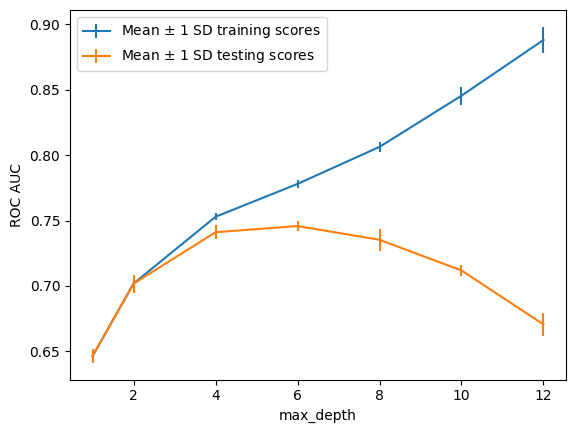

In [28]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

Os desvios padrão dos resultados de treinamento e teste são exibidos como linas verticais em cada valor de *max_depth* que foi testado; a distância acima e abaixo do resultado de média tem desvio padrão de 1. Na criação de ploteagens de barra de erro, é melhor assegurar que as unidades de medida de erro sejam iguais às unidades do eixo y. Nesse caso, elas são, já que o desvio padrão tem as mesmas unidades dos dados subjacentes, ao contrario da variância, por exemplo, que tem unidades quadradas.

As barras de erro indicam quanto os resultados variam entre os folds. Se houver muita variação, isso indica que a natureza dos dados entre os folds é diferente de uma maneira que afeta a habilidade de o modelo descrevê-la. Esse problema pode ser preocupante porque implica que podemos não ter dados suficientes para treinar um modelo que apresente um desempenho confiável para novos dados. No entanto, em nosso caso, não há muita variabilidade entre os folds, logo, estamos bem.

E quanto as tendências gerais dos resultados de treinamento e teste entre os diferentes valores de *max_depth*? Podemos ver que, à medida qeue criamos árvores cada vez mais profundas, o modelo ajusta melhor os dados de treinamento. Como mencionado anteriormente, se criarmos árvores suficientemente grandes para cada nó folha tenha apenas uma amostra de treinamento, geraremos um modelo muito específico dos dados de treinamento. Na verdade, ele ajustaria os dados de treinamento perfeitamente. Poderíamos dizer que esse seria um modelo de variância extremamente alta

Porém, esse desempenho com o conjunto de treinamento não é necessariamente passado para o conjunto de teste. Na figura axima, fica claro que o aumento de *max_depth* só aumenta os resultados do teste até um ponto, depois do qual na verdade árvores mais profundas têm desemprenho mais baixo no teste. Esse é outro exemplo de como podemos nos beneficiar do **trade-off entre viés e variância** para criar um modelo preditivo melhor - semelhante a como usamos uma regressão logística regularizada. Árvores menos profundas têm mais **viés**, já que não ajustam tão bem os dados de treinamento. Contudo, isso é bom porque, se aceitarmos algum viés, teremos melhor desempenho nos dados de teste, que é a métrica definitiva usada na seleção de hiperparâmetros de modelos

Nesse caso, selecionaríamos *max_depth = 6*. Você também poderia fazer uma pesquisa mais completa, testando todos os inteiros entre 2 a 12, em vez de dar santos de 2 como fizermos aqui. Geralmente, é uma boa ideia executar uma pesquisa o mais completa possível no espaço dos parâmetros, até os limites do tempo de computação que você tiver. No nosso caso, isso levaria ao mesmo resultado.

---

### Exercício 21: Ajustando uma floresta aleatória

Neste exercício, estenderemos os esforços que fizemos com as árvores de decisão, usando o modelo de floresta aleatória com a validação cruzada para os dados de treinamento do estudo de caso. Observaremos o efeito do aumento do número de árvores na floresta e examinaremos a importância das características que pode ser calculada com o uso de um modelo de floresta aleatória. Execute as etapas a seguir para fazer o exercício:

1. Importe o modelo classificador de floresta aleatória como mostrado a seguir:

In [29]:
from sklearn.ensemble import RandomForestClassifier

2. Instancie a classe usando estas opções:

In [36]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=4, verbose=0, warm_start=False, class_weight=None)

Para este exercício, usaremos principalmente as opções padrão. Porém, observe que configuramos *max_depth = 3*. Aqui, só examinaremos o efeito do uso de diferentes números de árvores, que ilustraremos com árvores relativamente rasas para obter runtimes mais curtos. Para encontrar o melhor desempenho do modelo, normalmente faríamos testes com profundidades maiores e em maior número para as árvores

Também configuramos *random_state* para obter resultados previsíveis entre as execuções.

3. Crie uma grade de parâmetros para este exercício para pesquisar os números de árvores variando de 10 a 100:

In [37]:
rf_param_ex = {'n_estimators': list(range(10,110,10))}

Usamos a função *range()* de Python para criar um iterador para os valores inteiros que queremos e depois os convertemos em uma *list* usando *list()*.

4. Instancie um objeto de validação cruzada por busca em grade para o modelo de floresta aleatória usando a grade de parâmetros da etapa anterior. Caso contrário, você pode usar as mesmas opções de validação cruzada da árvore de decisão:

In [38]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_param_ex, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=1, pre_dispatch='None', error_score='raise', return_train_score=True)

5. Ajuste o objeto de validação cruzada como mostrado a seguir:

In [39]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4, error_score='raise',
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch='None', return_train_score=True, scoring='roc_auc',
             verbose=1)

Você deve ter notado que, embora só estejamos usando a validação cruzada para 10 valores de hiperparâmetros, em comparação com os 7 valores que exataminamos para a árvore de decisão do exercicio anterior, essa validação cruzada demorou mais. Considere quantas árvores estamos criando nesse caso. Para o último hiperparâmetro, *n_estimators = 100*, criamos um total de 400 árvores para todas as divisões da validação cruzada.

Quanto tempo demorou o ajuste do modelo para os diferentes números de árvores que acabamos de usar? Que ganhos foram gerados para o desempenho do teste na validação cruzada com o uso de mais árvores? Essas são questões interessantes para serem examinadas com o uso de plotagens. Primeiro passaremos os resultados da validação cruzada para um DataFrame do pandas como fizemos antes.

6. Insira os resultados da validação cruzada em um DataFrame do pandas.

In [40]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.153000,0.005813,0.007079,0.000069,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.287683,0.014160,0.010045,0.000827,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.352754,0.001717,0.011404,0.000051,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,0.485313,0.013586,0.014330,0.000306,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,0.617566,0.015873,0.017564,0.000494,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191


7. Crie subplotagens, do tempo médio e dos resultados de média do teste com desvio padrão:

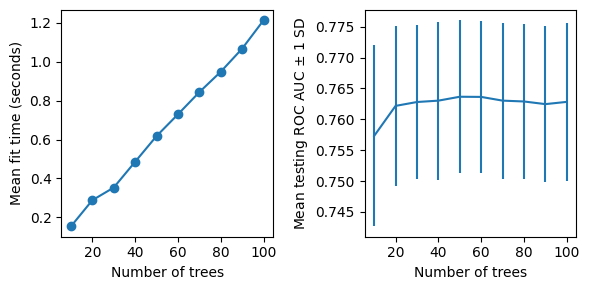

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD')
plt.tight_layout()

Aqui, usamos plt. subplots para criar dois eixos ao mesmo tempo dentro de uma figura em uma configuração de uma linha por duas colunas. Em seguida, acessamos os objetos de eixo, indexando o array de eixos axs retornado por essa operação para criar plotagens.

Há varias coisas que podemos observar nessas visualizações. Em primeiro lugar, podemos ver que usando uma floresta aleatória, o desempenho do modelo nos folds de teste da validação cruzada foi melhor que o de qualquer um de nossos esforços anteriores. Embora não tenhamos tentado ajustar os hiperparâmetros da flores aleatória para chegar ao melhor desempenho possível, esse é um resultado promissor e indica que uma floresta aleatória será um acrescimo valioso aos nossos esforços de modelagem

No entanto, junto com esses resultados mais altos para o teste do modelo, observe que também há mais variabilidade entre os folds do que vimos com a árvore de decisão; essa variabilidade é vista como desvios padrão maiores nos resultados de teste do modelo entre folds. Embora issoo indique que há uma variação no desempenho maior do que a esperada com o uso desse modelo, recomendamos que você examine os resultados de teste dos fold direnamente no DataFrame do pandas. Deve ver que até mesmo o menor resultado de um fold individual ainda é maior que o resultado médio de teste da árvore de decisão indicando que será melhor usar uma floresta aleatória.

E quanto às outras questões que queríamos examisnar com essa visualização? Queremos ver quanto leva o ajuste de modelos de floresta aleatória com vários números de árvores e quais são os ganhos no desempenho do modelo com o uso de mais árvores. A sub plotagem da esquerda mostra que há um aumento linear no tempo de treinamento à medida que mais árvores são adicionadas à floresta. isso é esperado; estamos multiplicando o volume de computação a ser executado no procedimento de treinamento com a inclusão de mais árvores.

Esse tempo de adicional vale a pena em termos de aumento de desempenho do modelo? A subplotagem da direitamostra que acima de cerca de 20 árvores não fica claro se a inclusão de mais árvores melhora realmente o desempenho do teste. Embora o modelo com 50 árvores tenho o resultado mais alto, o fato de a inclusão de mais árvores na verdade diminuir um pouco a pontuação de teste indica que o ganho na ROC AUC para 50 árvores deve ter ocorrido devido à aleatoriedade, já que teoricamente incluir mais árvores deve aumentar o desempenho do modelo. De acordo com esse raciocínio, se estivéssemos limitados a *max_depth = 3*, poderiamos optar por uma floresta de 20 ou talvez 50 árvores e prosseguir. Contudo, examinaremos o espaço dos parâmetros mais detalhadamente na atividade do fim deste capítulo.

Para concluir, observe que não mostramos as métricas ROC AUC de treinamento. Se você plotasse ou as procurasse no DataFrame de resultados, veria que as pontuações de treinamento são maiores que as de teste, indicando que algum nível de overfitting está ocorrendo. Embora possa ser esse o caso, também é verdade que a pontuação de teste desse modelo de floresta aleatória é mais alta do que a que observamos para qualquer outro modelo. Com base nesse resultado, provavelmente selecionaríamos o modelo de floresta aleatória.

Como aprendizado adicional sobre o que podemos acessar usando nosso objeto de validação cruzada ajustado, examinaremos os melhores hiperparâmetros e a importância das características.

8. Use este código para ver os melhores hiperparâmetros fornecidos pela validação cruzada:

In [43]:
cv_rf_ex.best_params_

{'n_estimators': 50}

Aqui, "melhor" significa apenas os hiperparâmetros que resultaram na mais alta pontuação média de teste do modelo.

9. Execute este código para criar um DataFrame dos nomes e da importância das características e exiba-o classificado por importância:

In [45]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1]
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})

feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


Nesse código, criamos um dicionário com os nomes e a importância das caracteristicas. A importância das características veio do método *best_estimator* do objeto de validação cruzada ajustado. Essa é uma maneira de acessarmos o objeto de modelo de floresta aleatória que foi treinado com todos os dados de treinamento usando os melhores hiperparâmetros que visualizamos na etapa anterior: *feature_importances* é um método que pode ser usado em modelos de floresta aleatória ajustados. Após inserir os nomes e a impooortância das características em um dicionário, criamos o DataFrame e depois exebimos classifcado na ordem decrescente por importância. Observe que as 5 características mais importantes da floresta aleatória  são as mesmas selecionadas por um teste F ANOVA no *Capítulo 3, Detalhes da regressão logística e exploração de características, embora estejam em uma ordem um pouco diferente. Essa é uma boa confirmação entre os diferentes métodos.

---

### Atividade 5: Busca em grade na validação cruzada com floresta aleatória

Nesta atividade, você conduzirá uma busca em grade pelas diversas árvores da floresta (*n_estimators*) e até a profundidade máxima de uma árvore (*max_depth*) do modelo de floresta aleatória com os dados do estudo de caso. Em seguida, criará uma visualização exibindo o resultado da média de teste para a grade de hiperparâmetros que pesquisou. Execute as etapas a seguir para concluir a atividade:

1. Crie um dicionário representando a grade para os hiperparâmetros *max_depth* e *n_estimators* que serão pesquisados. Inclua as profundidadaes 3, 6, 9, e 12, e 10, 50, 100 e 200 árvores. Deixe os outros hiperparâmetros com seus padrões.

In [52]:
rf_params = {'max_depth': [3, 6, 9, 12],
             'n_estimators': [10, 50, 100, 200]}

Para fins deste livro, usaremos *max_features='sqrt'* e limitaremos nossa exploração a *max_depth* e *n_estimators* para termos um runtime mais curto. Em uma situação do mundo real, você deve explorar outros hiperparâmetros de acordo com o tempo de computação que tiver. Lembre-se de que, para pesquisar em espaços de parâmetros especialmente grandes, você pode usuar *RandomizedSearchCV* a fim de evitar calcular exaustivamente métricas para cada combinação de hiperparâmetros na grade.

2. Instacie um objeto *GridSearchCV* usando as mesmas opções que empregamos anteriormente neste capítulo, mas com o dicionário de hiperparâmetros criado na etapa 1 desta atividade. Configure *verbose=2* para ver a saída de cada ajuste executado. Você pode reutilizar o mesmo objeto de modelo de floresta aleatória rf que estivemos usando.

In [53]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=2, pre_dispatch='None', error_score='raise', return_train_score=True)

3. Ajuste o objeto *GridSearchCV* com os dados de treinamento.

In [54]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.6s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.6s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=3, n_es

GridSearchCV(cv=4, error_score='raise',
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dispatch='None', return_train_score=True, scoring='roc_auc',
             verbose=2)

4. Insira os resultados da busca em grade em um DataFrame do pandas.

In [55]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

5. Crie uma visualização com *pcolormesh* da pontuação média de teste de cada combinação de hiperparâmetros.

Text(0, 0.5, 'Maximum depth')

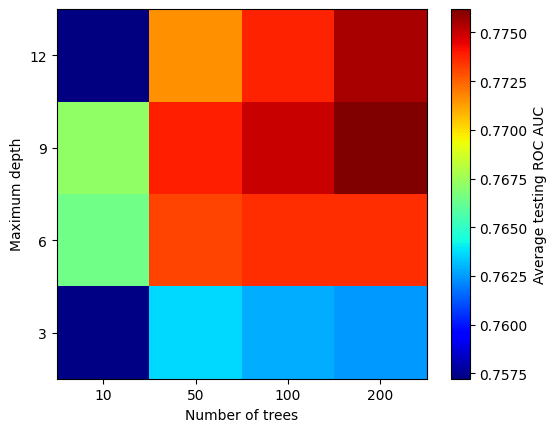

In [58]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

6. Decida que conjunto de hiperparâmetros usará

O conjunto a ser usado deve ser o que demonstra uma maior média de teste do ROC AUC. Logo, devemos usar *max_depth = 9* e *n_estimators = 200.